# Self Driving Cars con Decision Trees
El objetivo de este ejercicio es entrenar un modelo usando Decision Trees. Los datos se simulan artificialmente; luego se entrena un clasificador, se hace una predicción y finalmente de muestra la precisión del algoritmo.

Además, se crea un gráfico que muestra los puntos de test y el límite de decisión.

## Simular datos del terreno

In [1]:
import random

def makeTerrainData(n_points=1000):
##################################################################
### fake dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

## Dibujar puntos y límite de decisión

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def prettyPicture(clf, features_test, labels_test):
    x_min = 0.0
    x_max = 1.0
    y_min = 0.0
    y_max = 1.0

    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

    test_pred = clf.predict(features_test)  # Get predictions for test points
    grade_fast_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    bumpy_fast_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    grade_slow_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 1]
    bumpy_slow_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 1]

    plt.scatter(grade_fast_test, bumpy_fast_test, color='c', label='Rápido')
    plt.scatter(grade_slow_test, bumpy_slow_test, color='m', label='Lento')

    plt.xlabel('Baches')
    plt.ylabel('Pendiente')
    plt.legend()

    plt.savefig('decision_boundary.png')
    plt.show()

## Clasificar usando Decision Trees

En esta sección de código se presenta la función "classify".

Documentación de Decision Trees [Sklearn](https://scikit-learn.org/stable/modules/tree.html).

In [3]:
def classifyDT(features_train, labels_train):
    ### Importar el módulo sklearn para DT
    from sklearn import tree

    # Crear clasificador
    clf = tree.DecisionTreeClassifier()

    ### Entrenar el clasificador usando características y etiquetas de entrenamiento
    clf.fit(features_train, labels_train)
    return clf

## Predecir los puntos de test

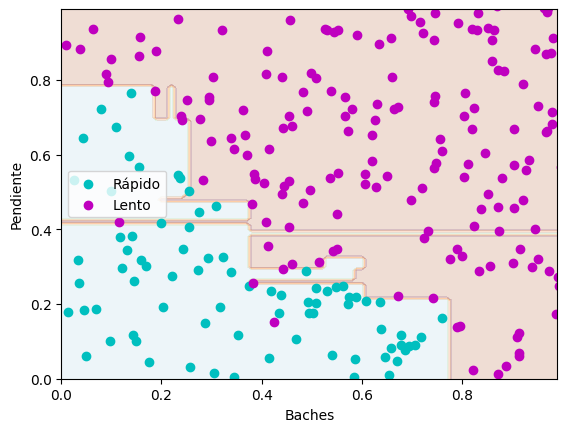

In [4]:
""" Clasificador Decision Tree para clasificar los datos del terreno.
    Recrea el límite de decisión y grafica """


features_train, labels_train, features_test, labels_test = makeTerrainData()

clf2 = classifyDT(features_train, labels_train)

#### Guardar las predicciones en una lista 'predicciones2'
predicciones2 = clf2.predict(features_test)

### Graficar los puntos de test y el límite de decisión
prettyPicture(clf2, features_test, labels_test)

## Precisión del algoritmo

Documentación de [Sklearn DT](https://scikit-learn.org/stable/modules/tree.html).

In [5]:
# Completar la siguiente línea

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicciones2, labels_test)

print ("La precisión es", accuracy)

La precisión es 0.912


## Parámetros en Decision Trees

In [6]:
def classifyDTP(features_train, labels_train):
    ### Importar el módulo sklearn para DT
    from sklearn import tree

    # Crear clasificador con parámetros
    clf = tree.DecisionTreeClassifier(min_samples_split=50)

    ### Entrenar el clasificador usando características y etiquetas de entrenamiento
    clf.fit(features_train, labels_train)
    return clf

El parámetro `min_samples_split` en el modelo `DecisionTreeClassifier` de scikit-learn establece el número mínimo de muestras necesarias para dividir un nodo en el árbol de decisión. En otras palabras, es el umbral mínimo de observaciones que debe tener un nodo para que se considere realizar una división en él.

### Efectos de `min_samples_split`:
1. **Sobreajuste vs. Subajuste**:
   - **Valores pequeños (e.g., 2)**: El árbol puede crecer mucho, generando muchas divisiones. Esto puede llevar a un sobreajuste (overfitting), donde el modelo ajusta demasiado bien los datos de entrenamiento pero generaliza mal a datos nuevos.
   - **Valores grandes**: Limita el número de divisiones y genera árboles más simples. Esto puede ayudar a evitar el sobreajuste, pero también corre el riesgo de subajuste (underfitting), donde el árbol es demasiado simple para capturar las relaciones en los datos.

2. **Profundidad del árbol**:
   - Valores bajos de `min_samples_split` permiten que el árbol crezca más profundo, ya que se crean más nodos internos.
   - Valores altos limitan la profundidad del árbol, ya que muchos nodos no alcanzan el umbral mínimo de muestras para dividirse.

3. **Eficiencia computacional**:
   - Con un valor más alto, el modelo puede ser más eficiente, ya que se evita la creación de muchos nodos y ramas adicionales.
   - Valores pequeños pueden hacer que el modelo sea más lento y consuma más memoria al aumentar el número de nodos generados.

### Ejemplo:
Si se establece `min_samples_split=50`, un nodo necesitará al menos 50 muestras para dividirse. Si en algún nodo hay menos de 50 muestras, no se dividirá y se convertirá en una hoja del árbol.

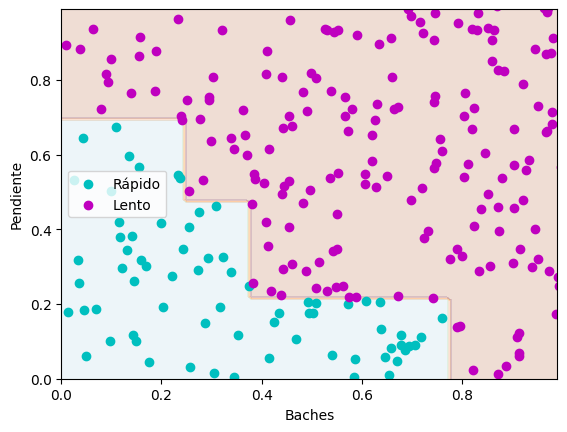

In [7]:
""" Clasificador DT con parámetro min_samples_split=50 para clasificar los datos del terreno.
    Recrea el límite de decisión y grafica """

clf50 = classifyDTP(features_train, labels_train)

#### Guardar las predicciones en una lista 'predicciones50'
predicciones50 = clf50.predict(features_test)

### Graficar los puntos de test y el límite de decisión
prettyPicture(clf50, features_test, labels_test)

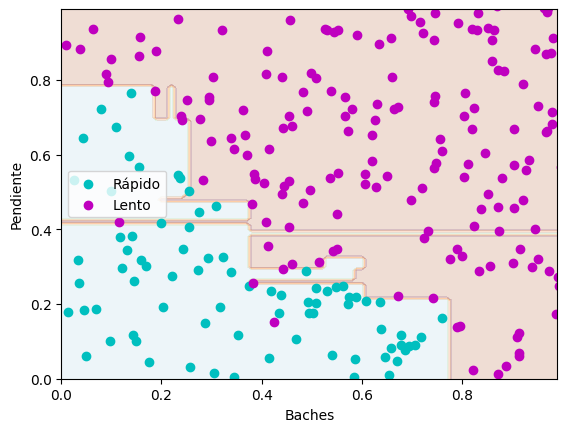

In [8]:
## Gráfico de clasificador DT sin parámetros
prettyPicture(clf2, features_test, labels_test)

## Precisión

In [9]:
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(predicciones2, labels_test)
accuracy50 = accuracy_score(predicciones50, labels_test)

print ("La precisión con min_samples_split=2 es", accuracy2)
print ("La precisión con min_samples_split=50 es", accuracy50)

La precisión con min_samples_split=2 es 0.912
La precisión con min_samples_split=50 es 0.912
